# INF 143: Visualizing Amounts

This notebook covers basic methods for visualizing amounts using bar plots, grouped/stacked bars, dot plots, and heatmaps. These examples use `ggplot2` and data from the `gapminder` dataset, as discussed in Lecture 4.

We'll start by installing and loading the necessary libraries.


In [ ]:
# Install these packages the first time you run the notebook
install.packages("ggplot2")
install.packages("gapminder")
install.packages("dplyr")
install.packages("viridis")

# Load libraries
library(ggplot2)
library(gapminder)
library(dplyr)
library(viridis)


# Variables and Data Types

You can create variables using `<-` or `=`.
R supports basic data types like numbers, characters (strings), and logical values (TRUE/FALSE).

In [17]:
# Assigning values
x <- 5        # numeric
y <- "hello"  # character
z <- TRUE     # logical

# Print values
print(x)
print(y)
print(z)


[1] 5
[1] "hello"
[1] TRUE


# Vectors and Sequences

A vector is a basic data structure that holds values of the same type.
You can create vectors using `c()` and sequences using `:` or `seq()`.

In [18]:
# Create a numeric vector
nums <- c(2, 4, 6, 8)

# Create a character vector
names <- c("Alice", "Bob", "Carol")

# Create sequences
one_to_five <- 1:5
by_twos <- seq(0, 10, by = 2)

print(nums)
print(one_to_five)
print(by_twos)


[1] 2 4 6 8
[1] 1 2 3 4 5
[1]  0  2  4  6  8 10


# Data Frames

Data frames are like tables — each column can be a different type.
You can access columns with `$` or use indexing.


In [19]:
# Create a data frame
students <- data.frame(
  name = c("Alice", "Bob", "Carol"),
  age = c(21, 22, 20),
  passed = c(TRUE, FALSE, TRUE)
)

# View the full data frame
print(students)

# Access specific columns
students$name
students[1, ]     # First row
students[, "age"] # Age column


   name age passed
1 Alice  21   TRUE
2   Bob  22  FALSE
3 Carol  20   TRUE


[1] "Alice" "Bob"   "Carol"

,name,age,passed
,<chr>,<dbl>,<lgl>
1,Alice,21,TRUE


[1] 21 22 20

# Bar Plots

Bar plots are useful for showing the magnitude of a set of values across different categories.

In `ggplot2`, you can create a bar plot using `geom_bar(stat = "identity")`, where each bar's height corresponds to a numeric value in the dataset.

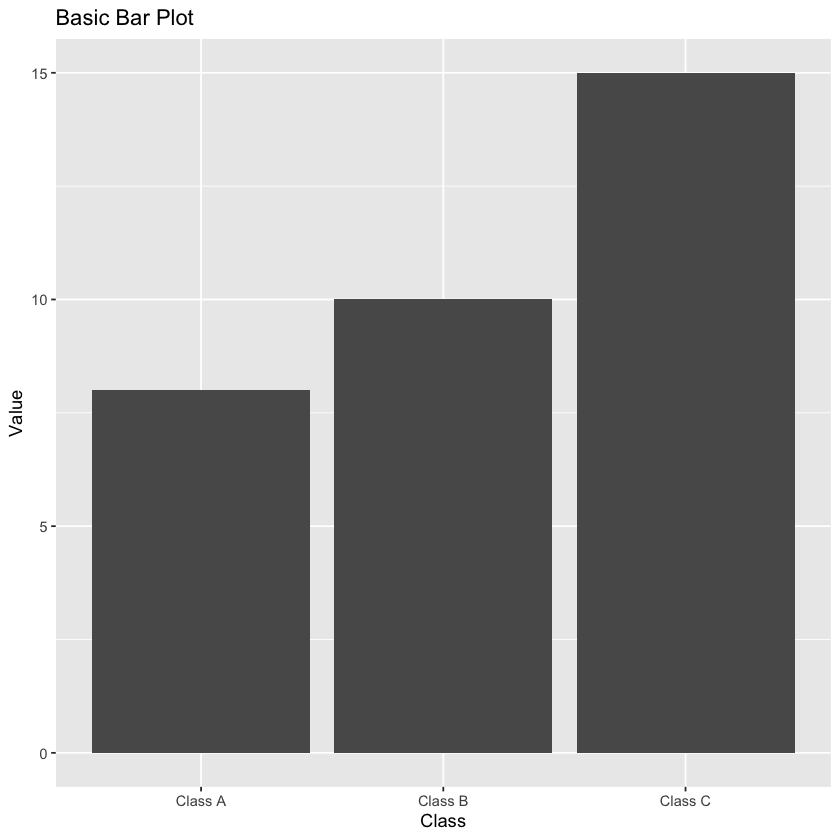

In [6]:
# Create a simple bar plot
myData <- data.frame(
  name = c("Class A", "Class B", "Class C"),
  value = c(8, 10, 15)
)

ggplot(myData, aes(x = name, y = value)) +
  geom_bar(stat = "identity") +
  labs(title = "Basic Bar Plot", x = "Class", y = "Value")


# Rotated Bar Plot

Sometimes it's helpful to rotate the bars for readability, especially if category names are long.

You can rotate the bar plot using `coord_flip()` in `ggplot2`.


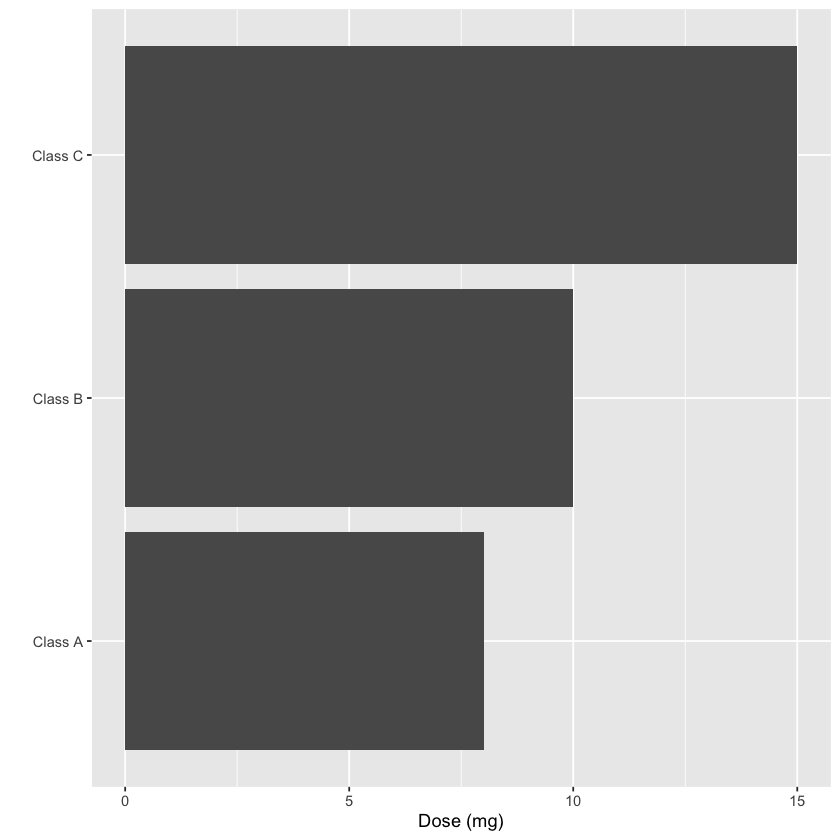

In [7]:
# Rotated version of the bar plot
ggplot(myData, aes(x = name, y = value)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "", y = "Dose (mg)")

# Ordered Bar Plot

If your categories don’t have a natural order, it can be helpful to sort them by their values.

You can do this in `ggplot2` using `reorder()` inside the aesthetic mapping.


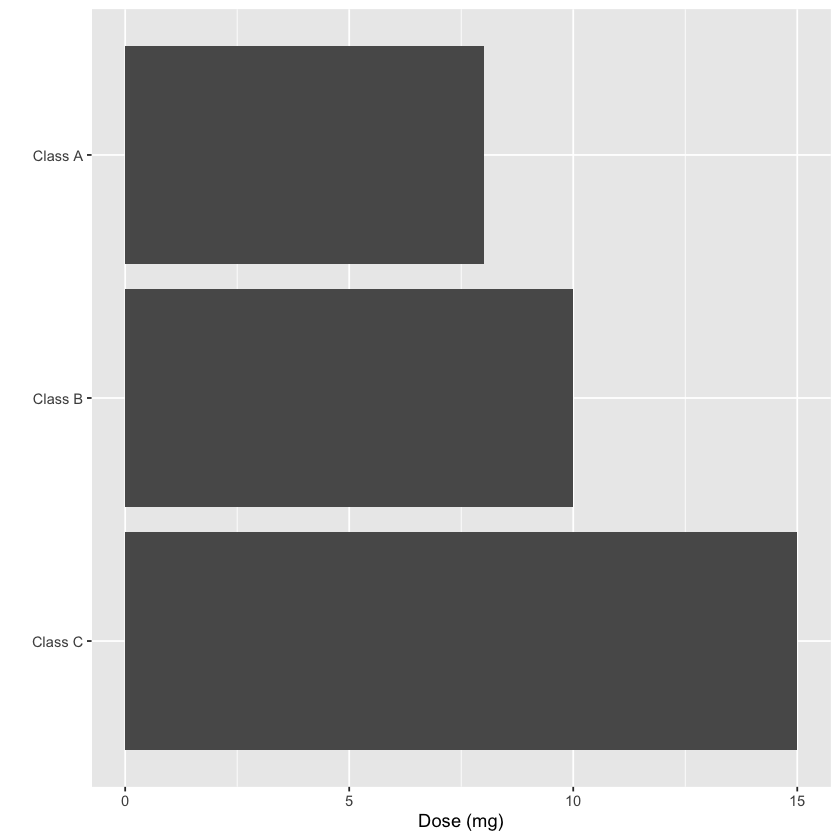

In [8]:
# Order bars by value (descending)
ggplot(myData, aes(x = reorder(name, -value), y = value)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "", y = "Dose (mg)")


# Axis Limits and Tick Marks

You can control the appearance of the x and y axes using:

- `ylim()` / `xlim()` to set the visible range
- `scale_y_continuous()` / `scale_x_continuous()` to customize tick positions and labels


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


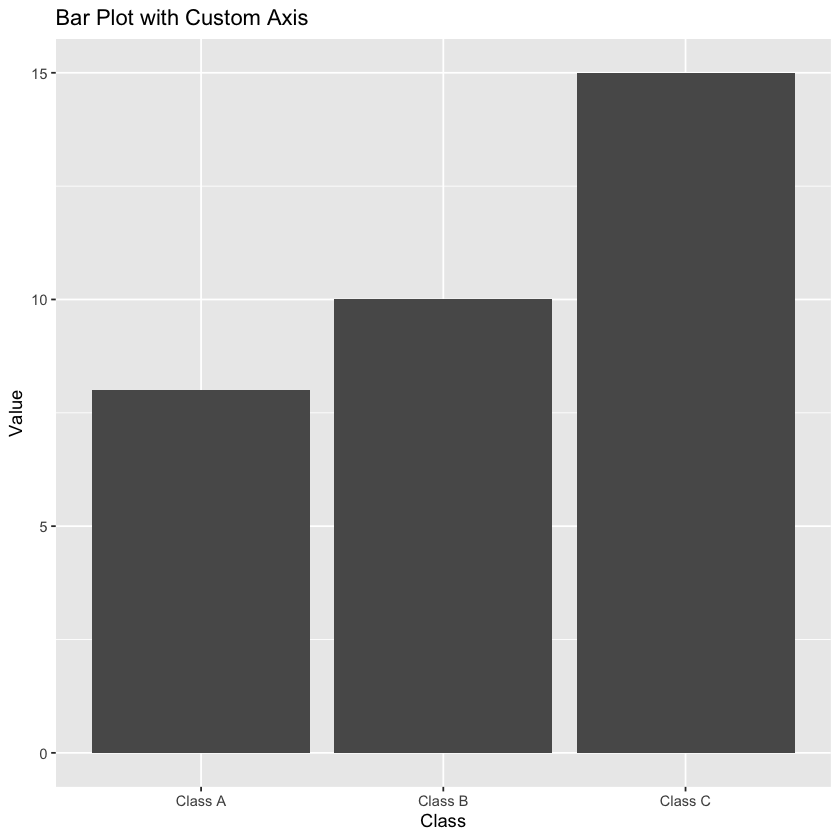

In [26]:
# Basic bar plot with axis customization
ggplot(myData, aes(x = name, y = value)) +
  geom_bar(stat = "identity") +
  ylim(0, 20) +  # Set y-axis range from 0 to 20
  scale_y_continuous(breaks = seq(0, 20, by = 5)) +  # Set tick marks every 5 units
  labs(title = "Bar Plot with Custom Axis", x = "Class", y = "Value")


# Logarithmic Scales

Use `scale_y_log10()` or `scale_x_log10()` to transform the axis to a logarithmic scale.

This is useful when values span multiple orders of magnitude, and you want to reveal relative differences more clearly.


The downloaded binary packages are in
	/var/folders/sb/ym6m1tvd75s0zpxpnjgcpgzh0000gn/T//RtmptBuZFx/downloaded_packages


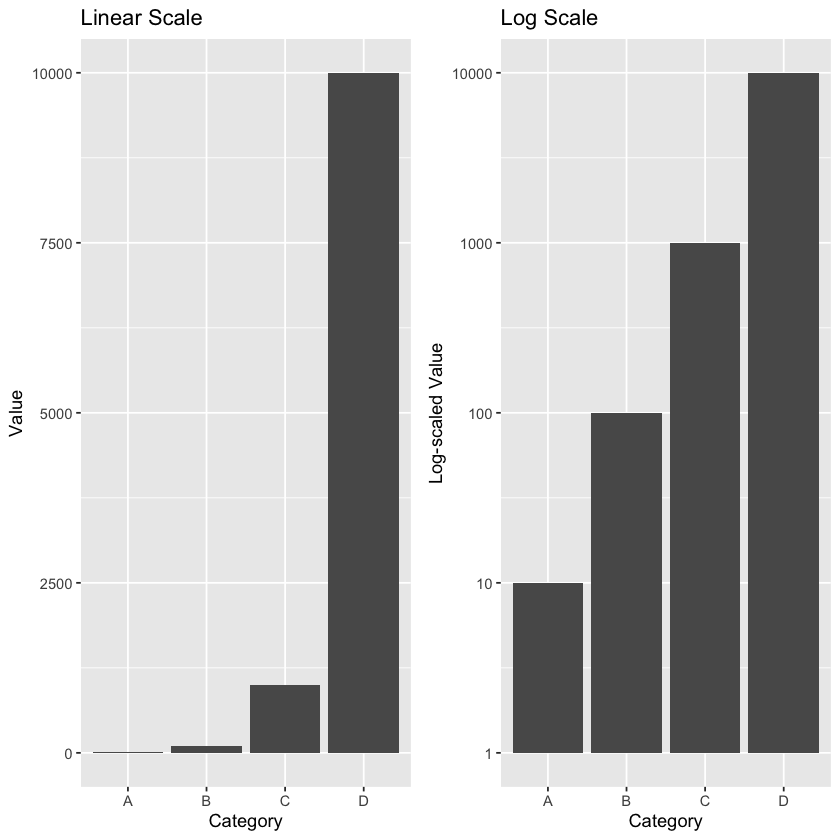

In [29]:
# Use gridExtra to plot them side by side
install.packages("gridExtra")  # Run once
library(gridExtra)

log_data <- data.frame(
  category = c("A", "B", "C", "D"),
  value = c(10, 100, 1000, 10000)
)

# Linear scale plot
p1 <- ggplot(log_data, aes(x = category, y = value)) +
  geom_bar(stat = "identity") +
  labs(title = "Linear Scale", x = "Category", y = "Value")

# Log scale plot
p2 <- ggplot(log_data, aes(x = category, y = value)) +
  geom_bar(stat = "identity") +
  scale_y_log10() +
  labs(title = "Log Scale", x = "Category", y = "Log-scaled Value")

# Display side-by-side
grid.arrange(p1, p2, ncol = 2)


# Grouped and Stacked Bar Plots

When you have two categorical variables, you can show them using grouped or stacked bar plots.

- Use `position = "dodge"` for grouped bars (side-by-side).
- Use the default (stacked) when the sum of values is meaningful.

We’ll use a dataset with two categorical variables: `Solution` and `Admission`.

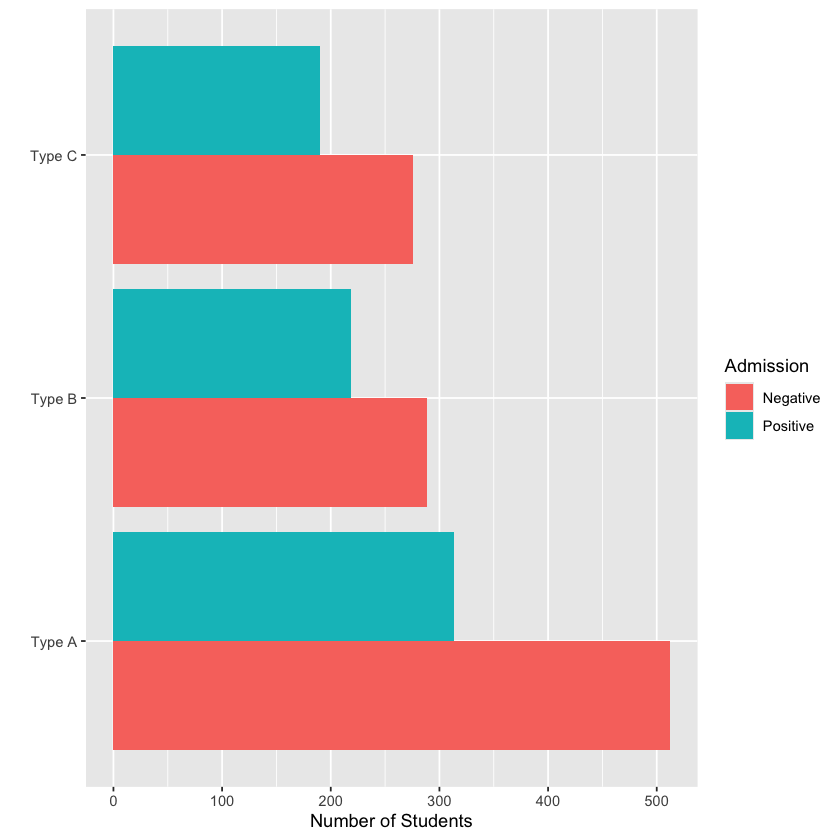

In [9]:
# Grouped bar plot (side-by-side bars)
myData2 <- data.frame(
  Admission = c("Negative", "Positive", "Negative", "Positive", "Negative", "Positive"),
  Solution = c("Type A", "Type A", "Type B", "Type B", "Type C", "Type C"),
  Freq = c(512, 313, 289, 219, 276, 190)
)

ggplot(myData2, aes(x = Solution, y = Freq, fill = Admission)) +
  geom_bar(position = "dodge", stat = "identity") +
  coord_flip() +
  labs(x = "", y = "Number of Students")


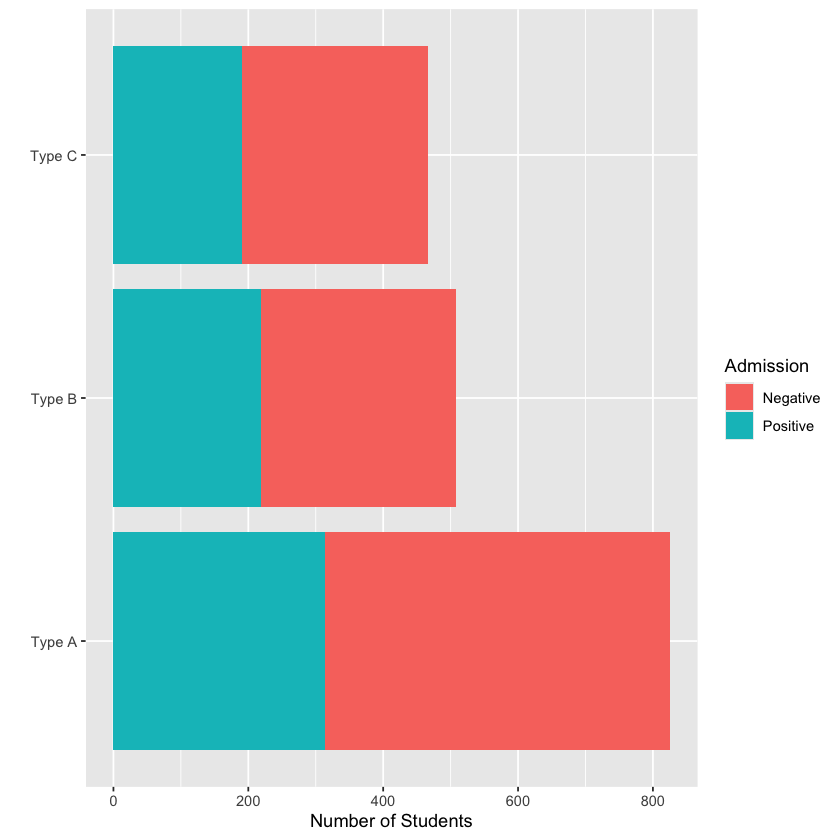

In [10]:
# Stacked bar plot (default behavior)
ggplot(myData2, aes(x = Solution, y = Freq, fill = Admission)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "", y = "Number of Students")


# Dot Plots

Dot plots are an alternative to bar plots. They are useful when:

- You don’t need to start the axis at zero
- You want to emphasize value and order rather than bar area

We'll use the `gapminder` dataset, filtered to show life expectancy in the Americas for the year 2007.


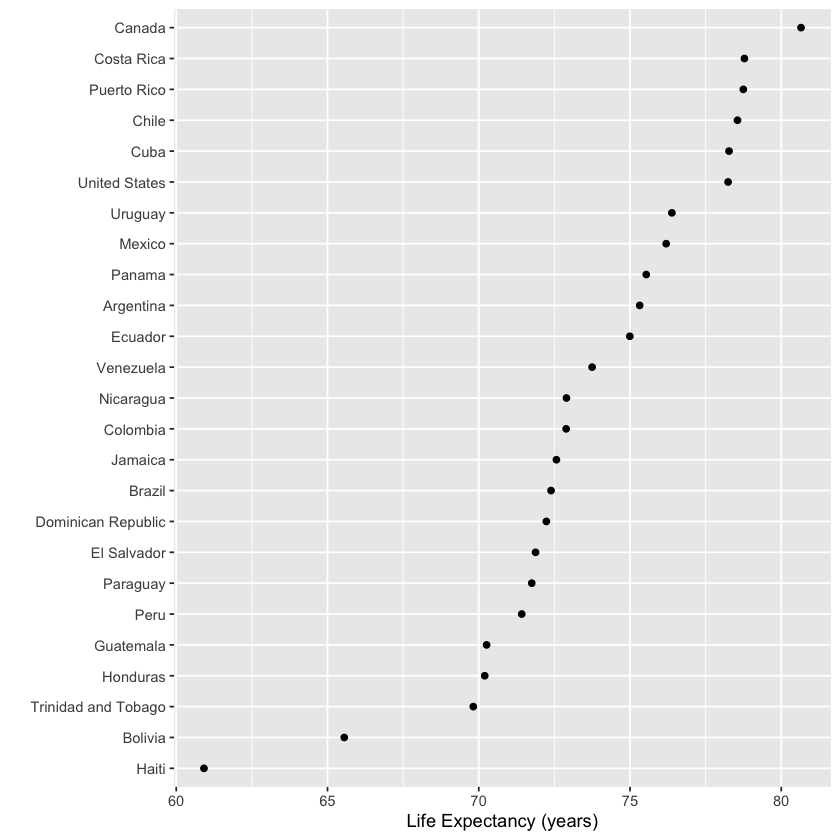

In [11]:
# Dot plot for life expectancy in 2007 (Americas only)
gapminder_2007 <- gapminder %>%
  filter(year == 2007, continent == "Americas")

ggplot(gapminder_2007, aes(x = reorder(country, lifeExp), y = lifeExp)) +
  geom_point() +
  coord_flip() +
  labs(x = "", y = "Life Expectancy (years)")


# Heatmaps

Heatmaps are useful for visualizing large datasets with two categorical axes. They use color to represent numeric values.

This is helpful when bar or dot plots become too cluttered.

We'll use `geom_tile()` to build a heatmap of life expectancy by country and year, using the `gapminder` dataset (Americas only).


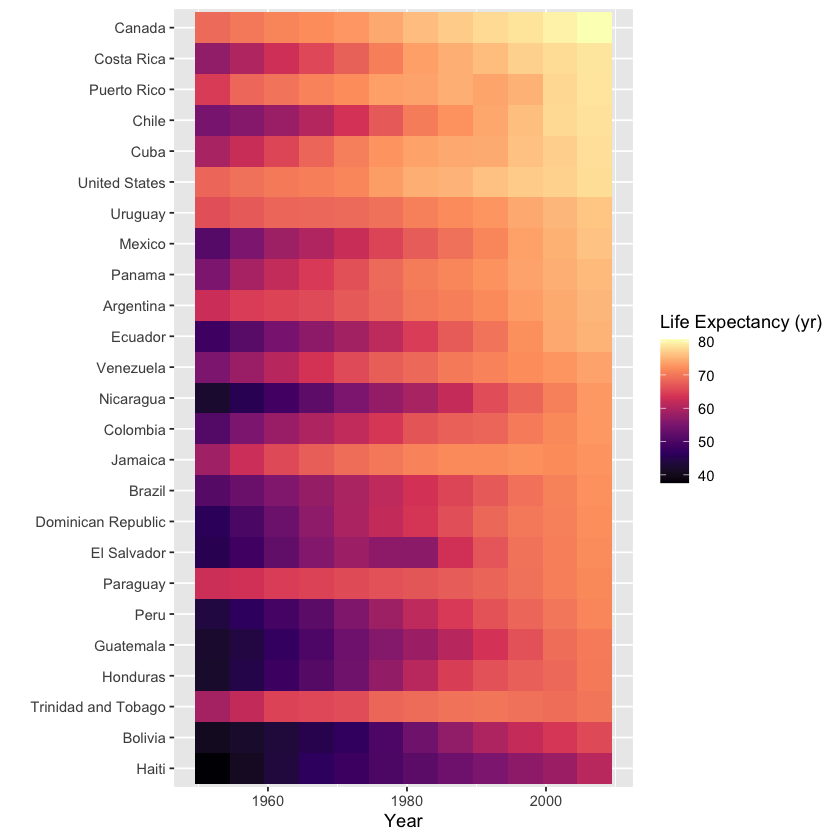

In [12]:
# Heatmap of life expectancy by country and year in the Americas
gapminder_americas <- gapminder %>%
  filter(continent == "Americas")

ggplot(gapminder_americas,
       aes(x = reorder(country, lifeExp, function(x) x[length(x)]),
           y = year, fill = lifeExp)) +
  geom_tile() +
  coord_flip() +
  labs(x = "", y = "Year", fill = "Life Expectancy (yr)") +
  scale_fill_viridis_c(option = "magma")


# Bar Plots with Different Colors

You can change the color of bars in a few ways:

1. Use `fill =` inside `aes()` to color by a variable
2. Use `fill =` outside `aes()` to manually apply a color

This is useful when you want to visually differentiate between categories.


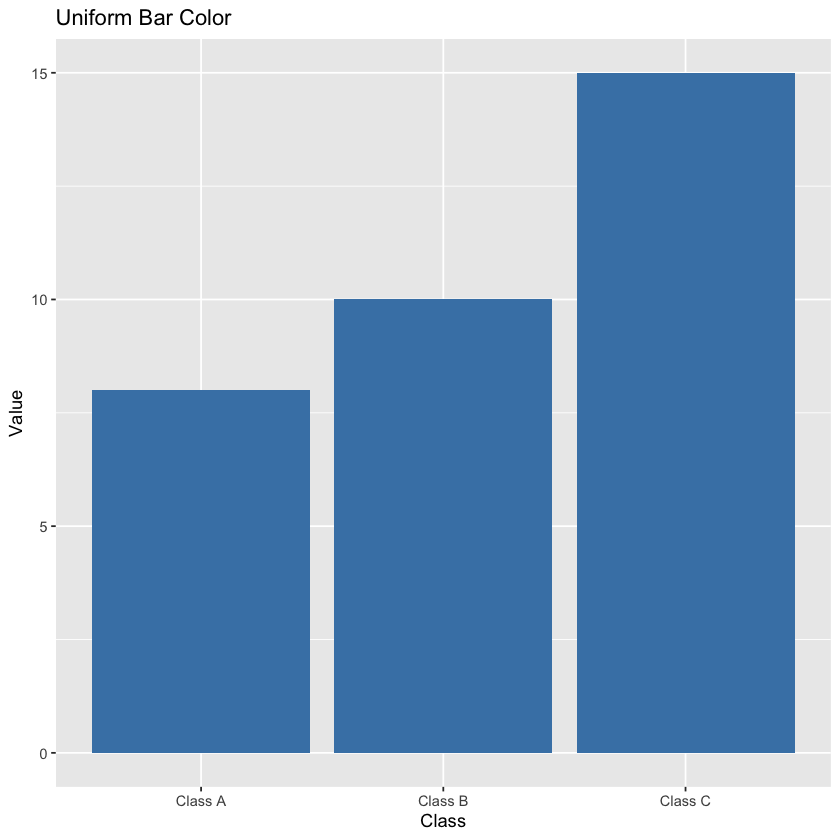

In [13]:
# All bars with the same custom color
ggplot(myData, aes(x = name, y = value)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Uniform Bar Color", x = "Class", y = "Value")


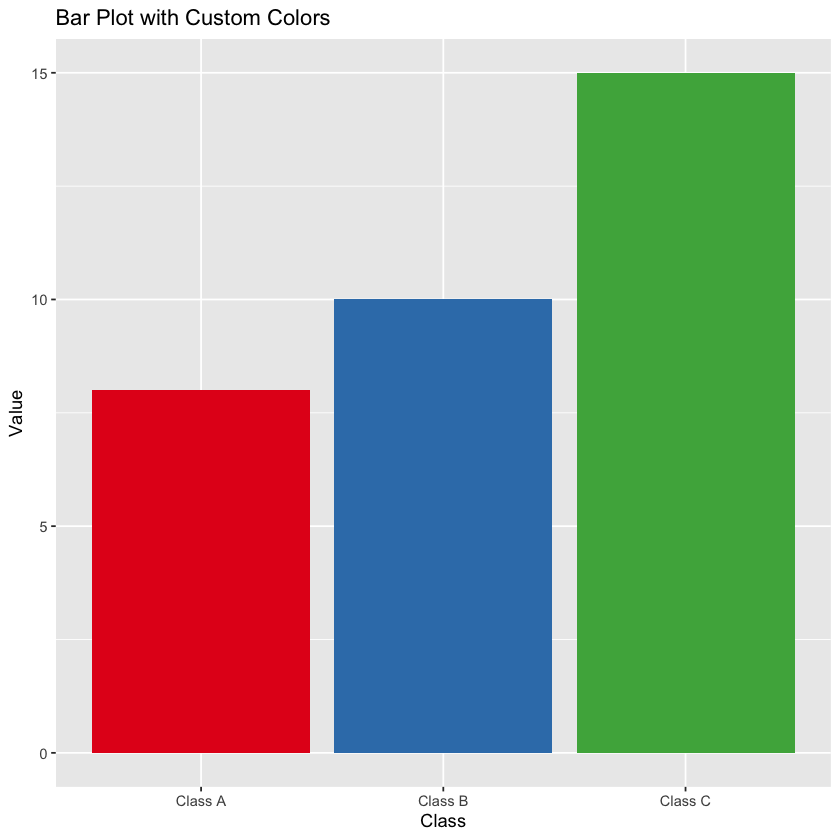

In [15]:
# Bar plot with manually assigned colors
ggplot(myData, aes(x = name, y = value, fill = name)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("Class A" = "#E41A1C",   # red
                               "Class B" = "#377EB8",   # blue
                               "Class C" = "#4DAF4A")) + # green
  labs(title = "Bar Plot with Custom Colors", x = "Class", y = "Value") +
  theme(legend.position = "none")


# Custom Colors in Grouped Bar Plots

To apply specific colors to groups (like "Positive" and "Negative" admissions), use `scale_fill_manual()`.

This helps when you want consistent or colorblind-friendly palettes.


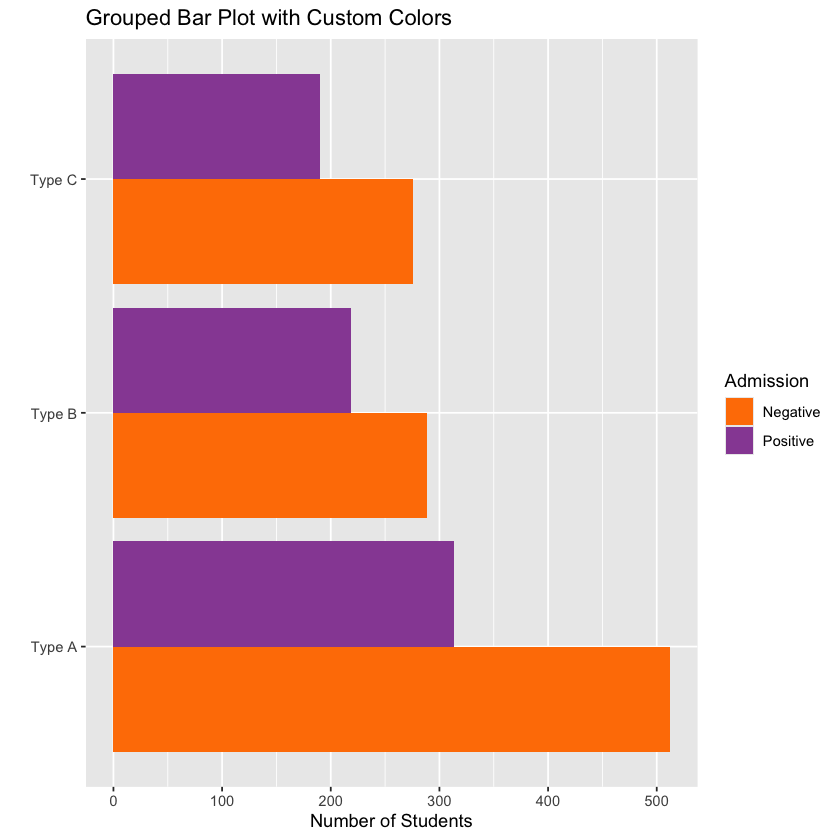

In [16]:
# Grouped bar plot with custom colors for Admission types
ggplot(myData2, aes(x = Solution, y = Freq, fill = Admission)) +
  geom_bar(position = "dodge", stat = "identity") +
  scale_fill_manual(values = c("Negative" = "#FF7F00",  # orange
                               "Positive" = "#984EA3")) + # purple
  coord_flip() +
  labs(title = "Grouped Bar Plot with Custom Colors",
       x = "", y = "Number of Students")


# Bonus: Animated Life Expectancy Plot (Gapminder)

Let’s animate life expectancy over time across countries in the Americas.

This uses `gganimate`, which builds on top of `ggplot2`.


In [20]:
# Install this once (can take a few minutes)
install.packages("gganimate")
install.packages("gifski")       # needed to render the animation
install.packages("transformr")   # needed for smoother transitions

also installing the dependencies 'proxy', 'e1071', 'wk', 'classInt', 'DBI', 's2', 'units', 'Rcpp', 'hms', 'prettyunits', 'sf', 'lpSolve', 'progress', 'transformr', 'tweenr'





The downloaded binary packages are in
	/var/folders/sb/ym6m1tvd75s0zpxpnjgcpgzh0000gn/T//RtmptBuZFx/downloaded_packages

The downloaded binary packages are in
	/var/folders/sb/ym6m1tvd75s0zpxpnjgcpgzh0000gn/T//RtmptBuZFx/downloaded_packages

The downloaded binary packages are in
	/var/folders/sb/ym6m1tvd75s0zpxpnjgcpgzh0000gn/T//RtmptBuZFx/downloaded_packages


In [21]:
# Load animation library
library(gganimate)
library(gifski)
library(transformr)

In [22]:
# Filter the dataset
gap_americas <- gapminder %>% filter(continent == "Americas")

# Build the animated plot
p <- ggplot(gap_americas, aes(x = reorder(country, lifeExp), y = lifeExp, fill = country)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = 'Year: {frame_time}', y = "Life Expectancy", x = "") +
  theme_minimal() +
  theme(legend.position = "none") +
  transition_time(year) +
  ease_aes('linear')

# Render the animation
animate(p, nframes = 200, fps = 10, width = 800, height = 600, renderer = gifski_renderer())


In [23]:
# Save the animation as a .gif file
anim_save("life_expectancy.gif", animation = last_animation())


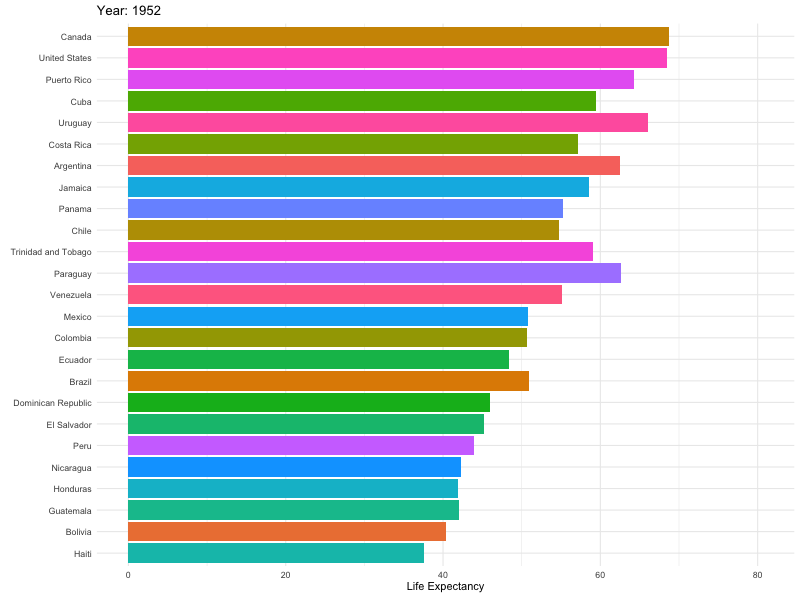

In [24]:
IRdisplay::display_png(file = "life_expectancy.gif")